In [1]:
import glob
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd
from skimage.filters import sobel, roberts, scharr, prewitt
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline
from skimage.io import imread

# Direct import using npz file

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
npz_car_final_filepath = '/content/drive/MyDrive/Colab Notebooks/car_final_data.npz'
np_array_final = np.load(npz_car_final_filepath, allow_pickle=True)
df_final = pd.DataFrame.from_dict({item: np_array_final[item] for item in np_array_final.files}, orient='index')

In [4]:
df = df_final.transpose()
df.head()

,images,labels
0,"[[[91, 69, 27], [88, 66, 24], [84, 62, 21], [8...",0
1,"[[[245, 245, 251], [245, 245, 251], [245, 245,...",0
2,"[[[80, 87, 84], [64, 71, 68], [49, 56, 53], [4...",0
3,"[[[50, 55, 53], [52, 57, 55], [57, 64, 61], [6...",0
4,"[[[243, 249, 254], [243, 249, 254], [243, 249,...",0


In [5]:
df1 = df[(df.index % 10 == 0 )] #smaller dataframe for processing

In [6]:
df1.keys()

Index(['images', 'labels'], dtype='object')

In [7]:
image = df1['images']

In [8]:
df1.head()

,images,labels
0,"[[[91, 69, 27], [88, 66, 24], [84, 62, 21], [8...",0
10,"[[[249, 254, 253], [249, 254, 253], [249, 254,...",0
20,"[[[174, 167, 170], [174, 167, 170], [174, 168,...",0
30,"[[[196, 194, 186], [196, 194, 186], [197, 195,...",0
40,"[[[34, 41, 38], [33, 40, 37], [32, 39, 36], [2...",0


In [9]:
test_image_min  = df1['images'][1000]
test_image_mod  = df1['images'][2500]
test_image_sev  = df1['images'][6000]

In [10]:
test_img_gray_min = cv2.cvtColor(test_image_min, cv2.COLOR_BGR2GRAY) 
test_img_blur_min = cv2.GaussianBlur(test_img_gray_min, (5, 5), 0)

test_img_gray_mod = cv2.cvtColor(test_image_mod, cv2.COLOR_BGR2GRAY) 
test_img_blur_mod = cv2.GaussianBlur(test_img_gray_mod, (5, 5), 0)

test_img_gray_sev = cv2.cvtColor(test_image_sev, cv2.COLOR_BGR2GRAY) 
test_img_blur_sev = cv2.GaussianBlur(test_img_gray_sev, (5, 5), 0)

# Testing Edge Filters

In [11]:
#SOBEL
# edge_sobel_min = sobel(test_img_gray_min)
# edge_sobel_mod = sobel(test_img_gray_mod)
# edge_sobel_sev = sobel(test_img_gray_sev)
edge_sobel_min = sobel(test_img_blur_min)
edge_sobel_mod = sobel(test_img_blur_mod)
edge_sobel_sev = sobel(test_img_blur_sev)

#ROBERTS
# edge_rob_min = roberts(test_img_gray_min)
# edge_rob_mod = roberts(test_img_gray_mod)
# edge_rob_sev = roberts(test_img_gray_sev)
edge_rob_min = roberts(test_img_blur_min)
edge_rob_mod = roberts(test_img_blur_mod)
edge_rob_sev = roberts(test_img_blur_sev)

#PREWITT
# edge_prewitt_min = prewitt(test_img_gray_min)
# edge_prewitt_mod = prewitt(test_img_gray_min)
# edge_prewitt_sev = prewitt(test_img_gray_sev)
edge_prewitt_min = prewitt(test_img_blur_min)
edge_prewitt_mod = prewitt(test_img_blur_mod)
edge_prewitt_sev = prewitt(test_img_blur_sev)

#SCHARR
# edge_sch_min = scharr(test_img_gray_min)
# edge_sch_mod = scharr(test_img_gray_mod)
# edge_sch_sev = scharr(test_img_gray_sev)
edge_sch_min = scharr(test_img_blur_min)
edge_sch_mod = scharr(test_img_blur_mod)
edge_sch_sev = scharr(test_img_blur_sev)


# TODO: ADD GAUSSIAN FILTERS
# LOG, a very useful kernel for edge detection in images and DOG kernel
# LOG filter (Laplacian of Gaussian Kernel)
# DOG filter (Difference of Gaussian)

# Simple Canny Edge Detection


In [12]:
edge_canny_min = cv2.Canny(test_img_blur_min, threshold1=30, threshold2=200)
edge_canny_mod = cv2.Canny(test_img_blur_mod, threshold1=30, threshold2=200) 
edge_canny_sev = cv2.Canny(test_img_blur_sev, threshold1=30, threshold2=200) 

# Comparing Original vs Filtered Image

In [13]:
def image_compare(image, filtered_image, filter_type):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

  ax1.imshow(image, cmap=plt.cm.gray) 
  ax1.set_title('Original Image', fontsize=24) 

  image_rescaled = exposure.rescale_intensity(filtered_image, in_range=(0, 10)) 

  ax2.imshow(image_rescaled, cmap=plt.cm.gray) 
  filter_list = {'sobel': 'Sobel Filter Edge Detection', 'roberts': 'Roberts Filter Edge Detection', 'scharr': 'Scharr Filter Edge Detection', 'prewitt': 'Prewitt Filter Edge Detection', 'canny': 'Canny Filter Edge Detection'}

  for key in filter_list:
    if key == filter_type:
      ax2.set_title(filter_list[filter_type], fontsize=24)

  plt.tight_layout()
  plt.show()

#### Severe Car Damage

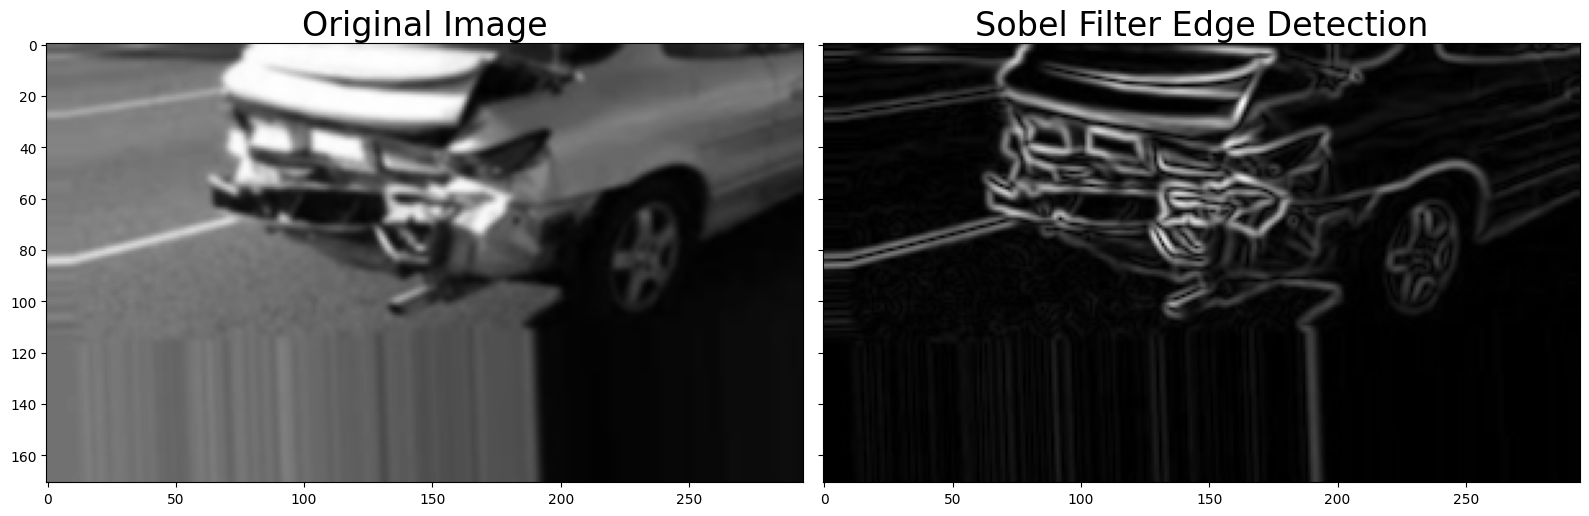

In [14]:
image_compare(test_img_blur_sev, edge_sobel_sev, 'sobel' )

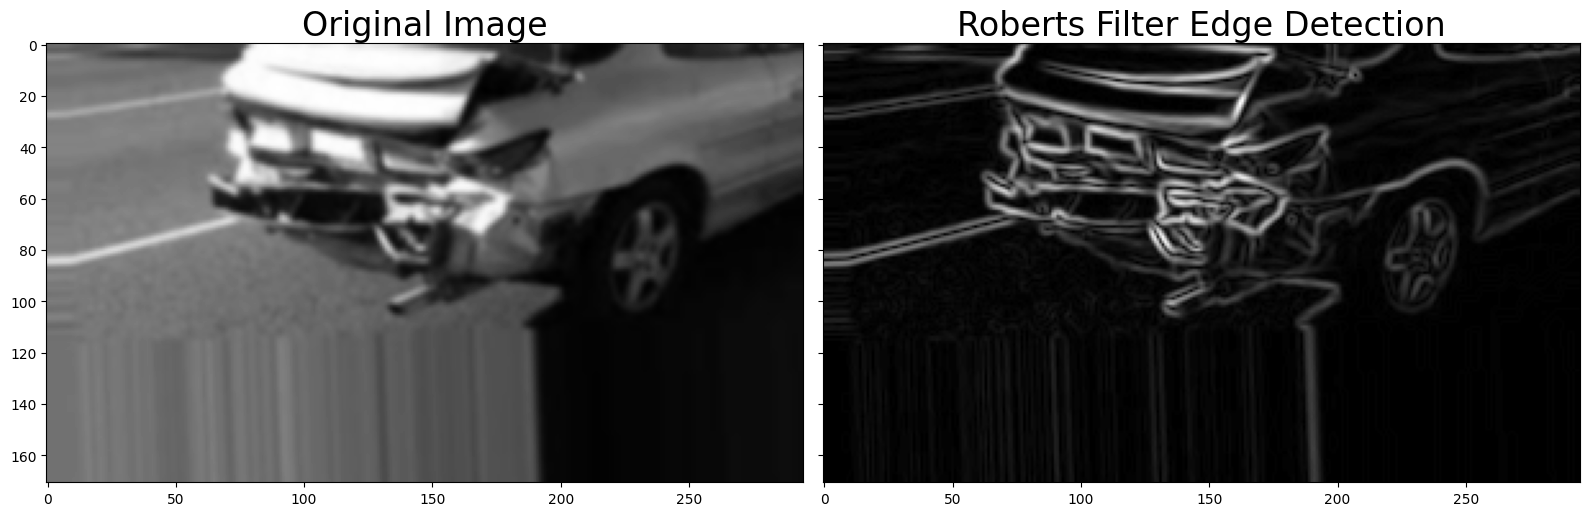

In [15]:
image_compare(test_img_blur_sev, edge_rob_sev, 'roberts' )

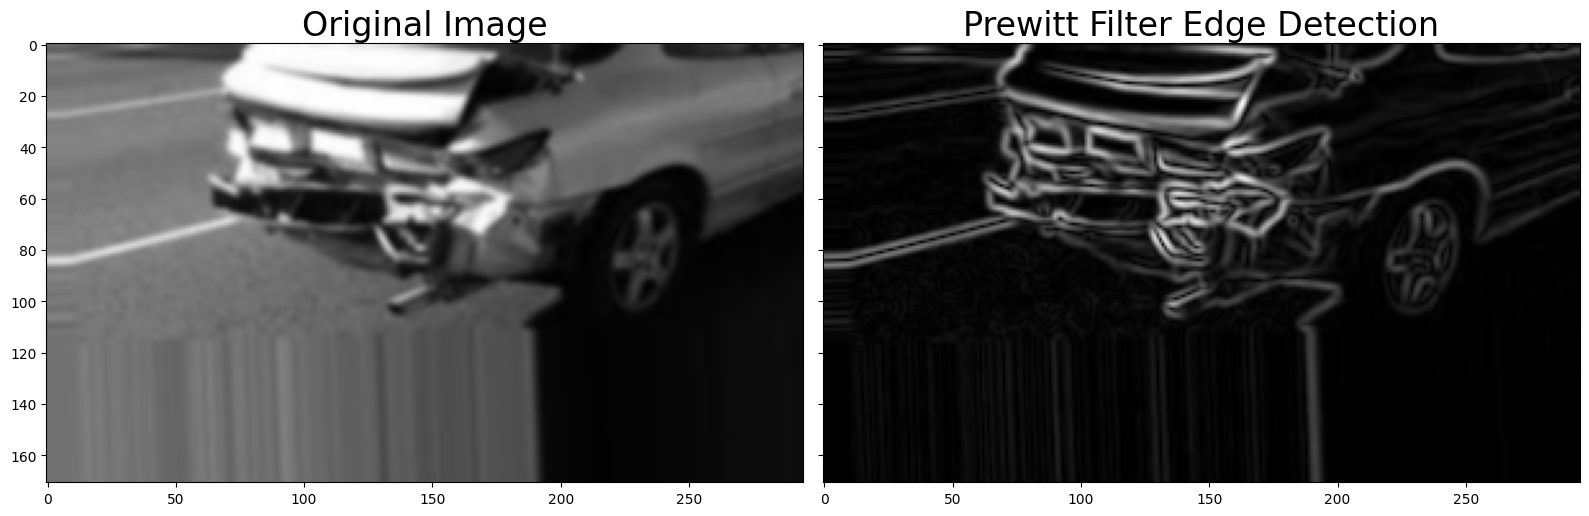

In [16]:
image_compare(test_img_blur_sev, edge_prewitt_sev, 'prewitt' )

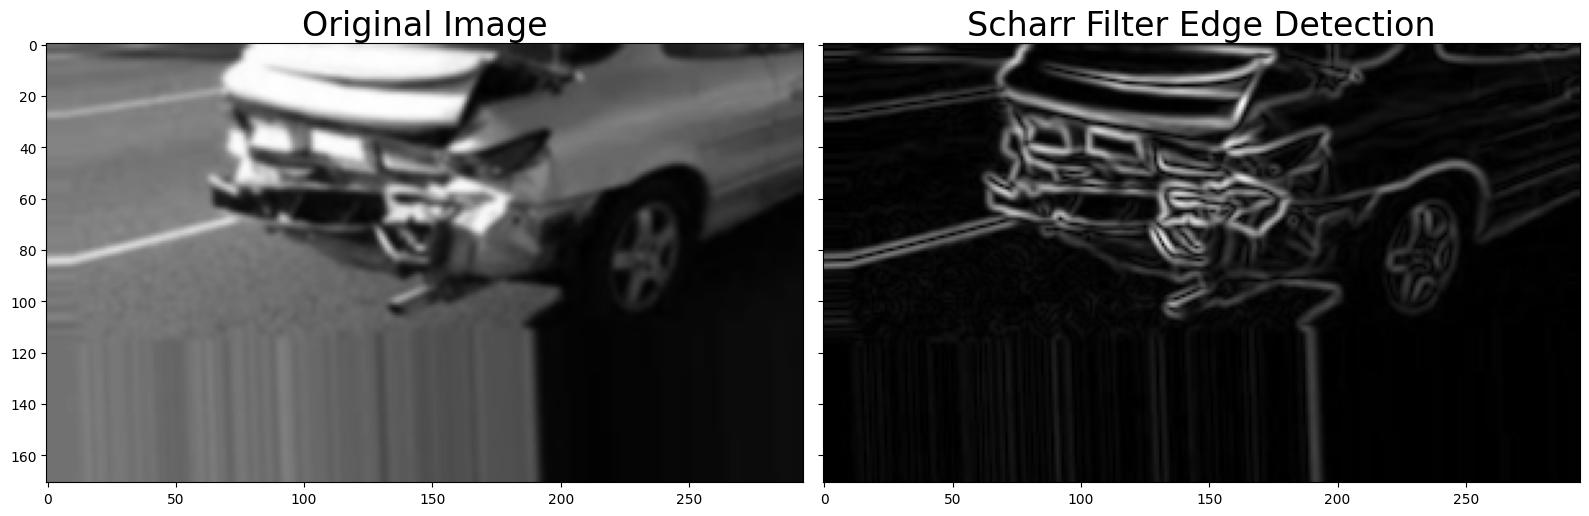

In [17]:
image_compare(test_img_blur_sev, edge_sch_sev, 'scharr' )

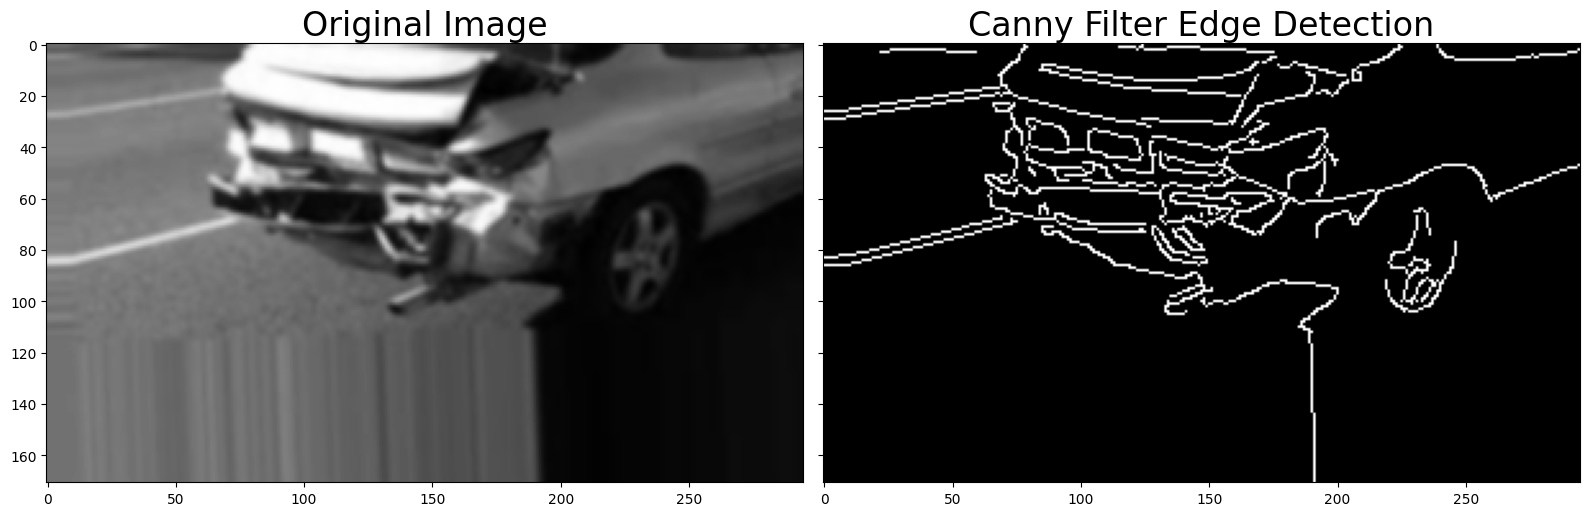

In [18]:
image_compare(test_img_blur_sev, edge_canny_sev, 'canny' )

# UMAP

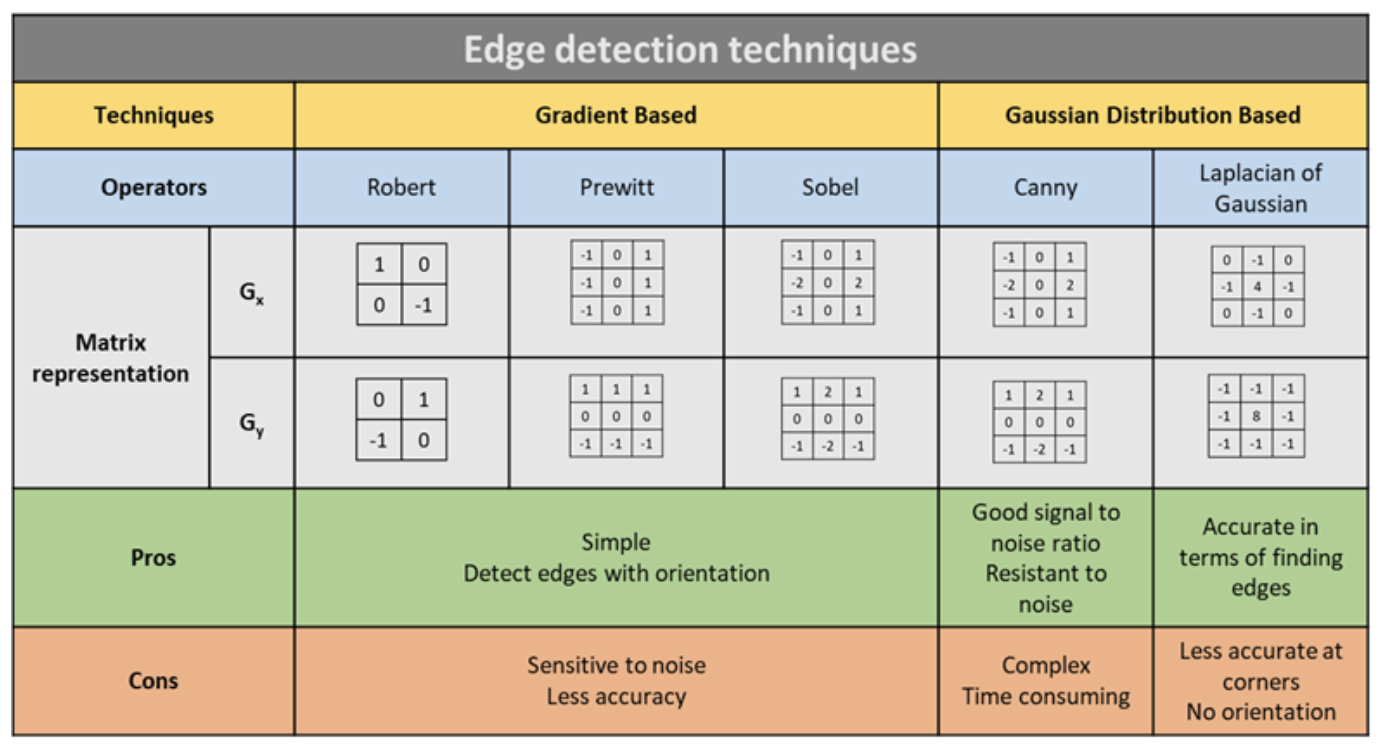

In [19]:
from PIL import Image

table_fp = '/content/drive/MyDrive/Colab Notebooks/Edge_detection_techniques.png'
img = Image.open(table_fp)
img.show()

## Sobel 

In [20]:
filter_name = 'sobel'
# filter_list = ['sobel', 'roberts', 'prewitt', 'scharr', 'canny']
features = []
X_img = df1['images']
labels = df1['labels']
size_2 = (300,300,2)
size_3 = (300,300,3)

In [21]:
df1.shape, X_img.shape, labels.shape

((757, 2), (757,), (757,))

In [22]:
for image in X_img:
    fd = sobel(image)
    hfe = np.hstack([fd])
    hfe.resize(size_3)
    features.append(hfe)

In [23]:
# for image in X_img:
#   img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#   img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
#   choose_filter = {
#     'sobel': [sobel(img_blur), size_3],
#     'roberts': [roberts(img_blur), size_2],
#     'prewitt': [prewitt(img_blur), size_3],
#     'scharr': [scharr(img_blur), size_3],
#     'canny': [cv2.Canny(img_blur, threshold1=30, threshold2=200), size_3]
#     }
#   filtered_img = choose_filter[filter_name][0]
#   hfe = np.hstack([filtered_img])
#   hfe.resize(choose_filter[filter_name][1])
#   features.append(hfe)

In [24]:
X_train = np.array(features)
X_train = X_train.reshape(len(X_train), 300*300*3)
Y_train = np.array(labels).astype('int')

In [27]:
# !pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=134d423bffe628f3651c29984947fa396a47db8958e3fa7508c8c29cb17ca8a3
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=5e442635132633e960d9e793597ed77b9b732fa8306ffd198dc96ee63ecdc5b9
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [28]:
import umap.umap_ as umap
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)

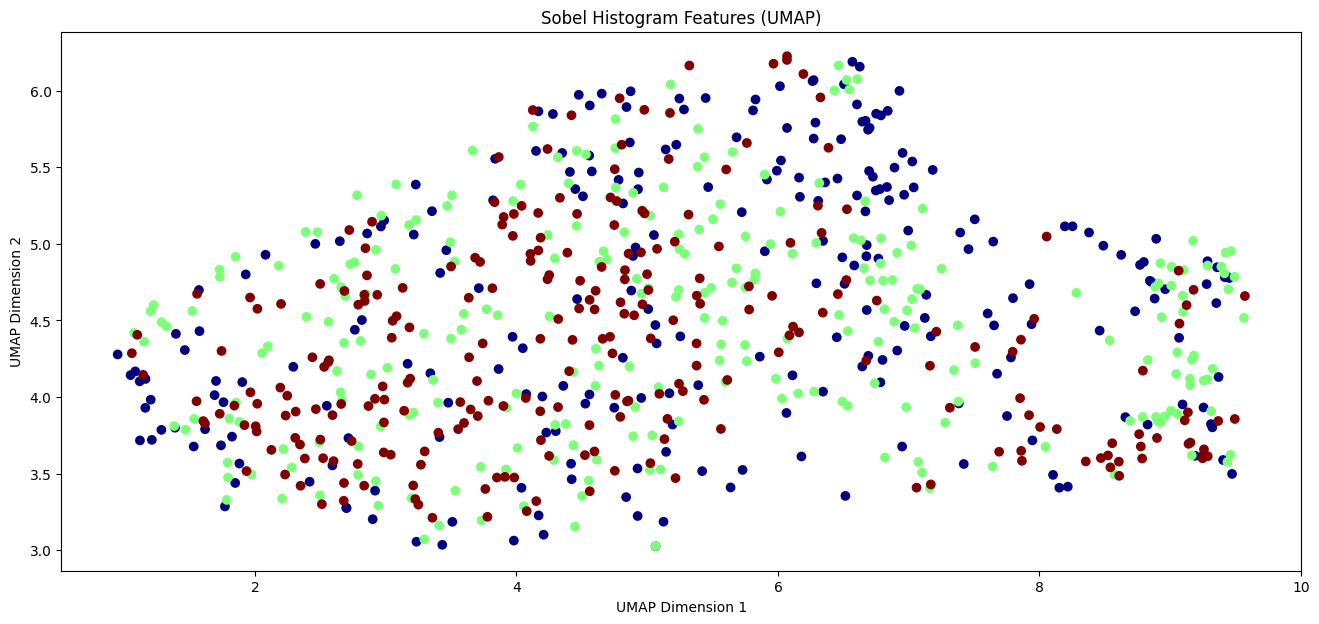

In [29]:
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Sobel Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## Prewitt

In [30]:
features = []
X_img = df1['images']
labels = df1['labels']
size_2 = (300,300,2)
size_3 = (300,300,3)

for image in X_img:
    fd = prewitt(image)
    hfe = np.hstack([fd])
    hfe.resize(size_3)
    features.append(hfe)

X_train = np.array(features)
X_train = X_train.reshape(len(X_train), 300*300*3)
Y_train = np.array(labels).astype('int')

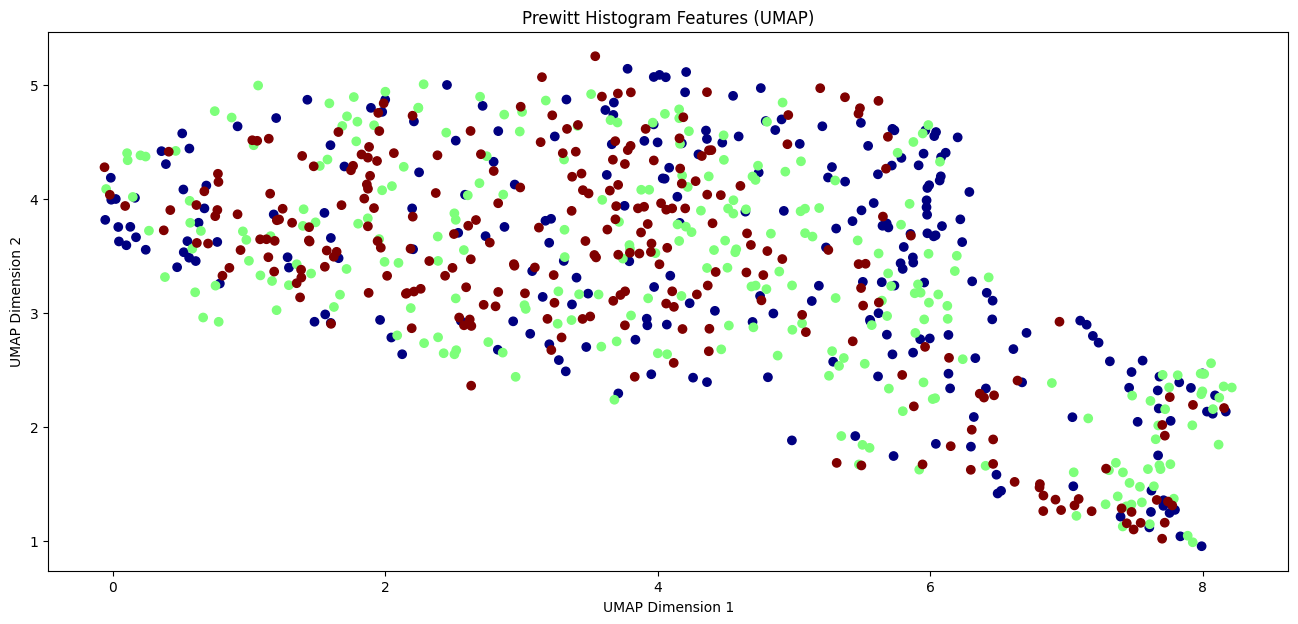

In [31]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Prewitt Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## Scharr

In [32]:
features = []
X_img = df1['images']
labels = df1['labels']
size_2 = (300,300,2)
size_3 = (300,300,3)

for image in X_img:
    fd = scharr(image)
    hfe = np.hstack([fd])
    hfe.resize(size_3)
    features.append(hfe)

X_train = np.array(features)
X_train = X_train.reshape(len(X_train), 300*300*3)
Y_train = np.array(labels).astype('int')

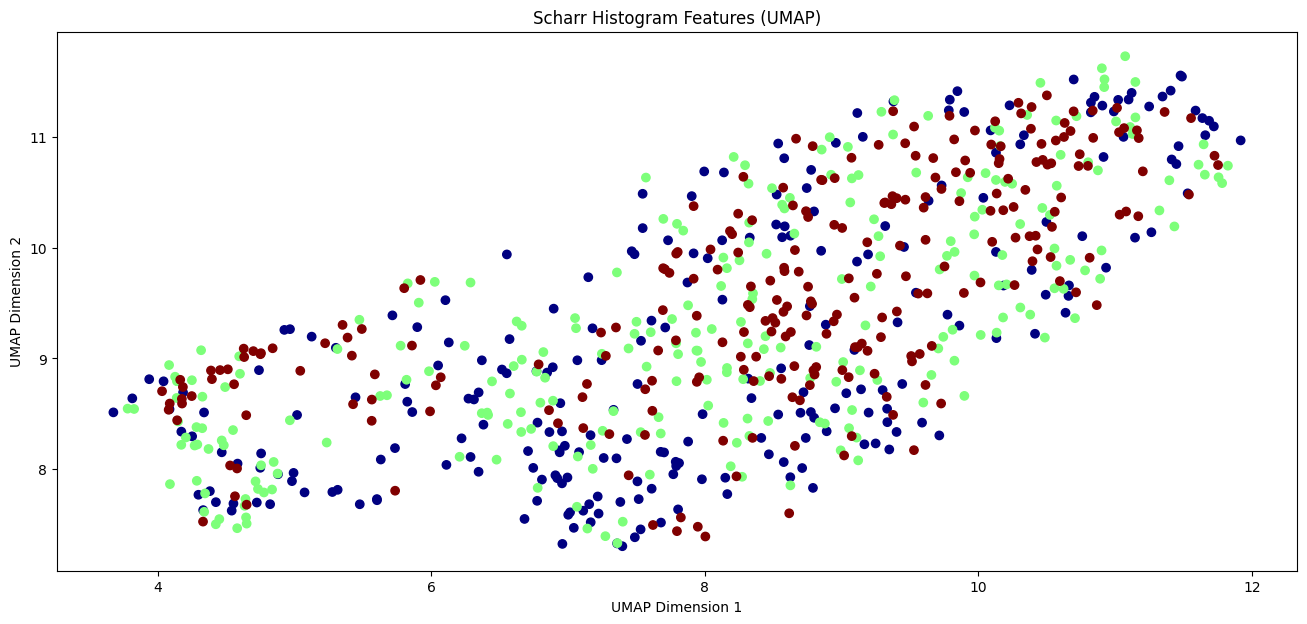

In [33]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Scharr Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## Canny

In [34]:
features = []
X_img = df1['images']
labels = df1['labels']
size_2 = (300,300,2)
size_3 = (300,300,3)

for image in X_img:
    fd = cv2.Canny(image, threshold1=30, threshold2=200)
    hfe = np.hstack([fd])
    hfe.resize(size_3)
    features.append(hfe)

X_train = np.array(features)
X_train = X_train.reshape(len(X_train), 300*300*3)
Y_train = np.array(labels).astype('int')

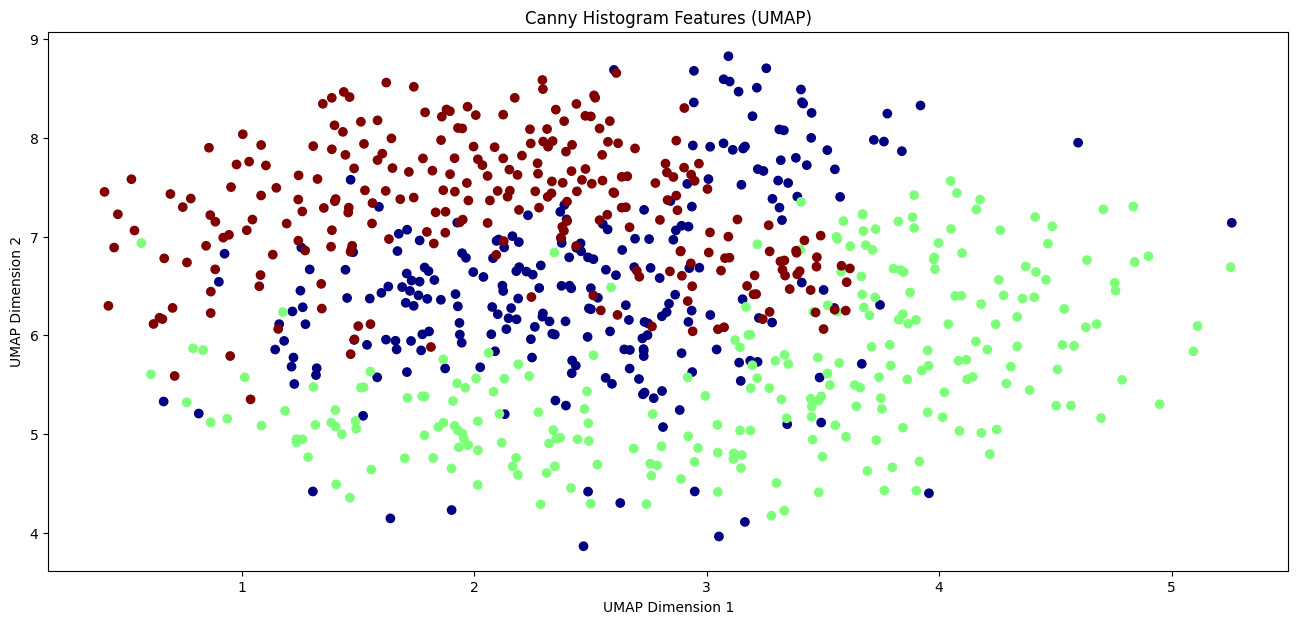

In [35]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Canny Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Running RandomForest ML on best feature (Canny)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

#### Preliminary ML results

In [45]:
def run_model_comparison(X_train, y_train, X_test, y_test):
    dfs = []
    models = [
        ('LogReg', LogisticRegression()), 
        # ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        # ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('GNB', GaussianNB()),
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_labels = ['0', '1', '2']
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_labels))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
run_model_comparison(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.53      0.35      0.42        80
           1       0.47      0.36      0.41        78
           2       0.35      0.59      0.44        70

    accuracy                           0.43       228
   macro avg       0.45      0.43      0.42       228
weighted avg       0.46      0.43      0.42       228

RF
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        80
           1       0.36      0.42      0.39        78
           2       0.38      0.47      0.42        70

    accuracy                           0.42       228
   macro avg       0.44      0.42      0.42       228
weighted avg       0.44      0.42      0.42       228

SVM
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        80
           1       0.48      0.19      0.28        78
           2       0.45      0.70      0.54        70

    ac

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,36.230093,0.076221,0.405660,0.458973,0.405660,0.381848,NaN,LogReg
1,45.795681,0.184352,0.330189,0.369588,0.330189,0.330683,NaN,LogReg
2,39.250093,0.087415,0.386792,0.375460,0.386792,0.379772,NaN,LogReg
3,34.221127,0.093692,0.358491,0.353670,0.358491,0.339840,NaN,LogReg
4,37.368872,0.093599,0.390476,0.372764,0.390476,0.368979,NaN,LogReg
5,3.780166,0.043112,0.509434,0.589626,0.509434,0.505694,NaN,RF
6,3.485184,0.045775,0.462264,0.470388,0.462264,0.461762,NaN,RF
7,3.277153,0.042965,0.301887,0.327792,0.301887,0.307334,NaN,RF
8,3.726502,0.059572,0.367925,0.389957,0.367925,0.358391,NaN,RF
9,4.212349,0.044259,0.476190,0.602422,0.476190,0.487320,NaN,RF


#### Hypertuning Rainforest Model

In [41]:
param_grid = { 
  'n_estimators': [90,100,115,130],
  'max_depth' : range(2,20,1),
  'criterion' :['gini', 'entropy'],
  # 'min_samples_leaf': range(1,10,1),
  # 'min_samples_split': range(2,10,1),
  # 'max_features': ['auto', 'log2'],
}


In [42]:
rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, verbose=3)
cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=90;, score=0.453 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=90;, score=0.443 total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=90;, score=0.425 total time=   3.3s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=90;, score=0.462 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=90;, score=0.438 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.462 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.415 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.425 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.491 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.467 total time=   0.9s
[CV 1/5] END criterion

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [43]:
best_params_rf = cv_rf.best_params_

In [44]:
rf_best = RandomForestClassifier(max_depth=best_params_rf['max_depth'], criterion=best_params_rf['criterion'], n_estimators=best_params_rf['n_estimators'])
rf_best.fit(X_train, y_train)
pred = rf_best.predict(X_test)
print("Accuracy for Random Forest: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy for Random Forest:  0.40789473684210525
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.39      0.42        80
           1       0.27      0.05      0.09        78
           2       0.40      0.83      0.54        70

    accuracy                           0.41       228
   macro avg       0.38      0.42      0.35       228
weighted avg       0.38      0.41      0.34       228



In [48]:
print(best_params_rf)

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 90}


# Train Test Split First, UMAP, then ML


In [49]:
features = []
X_img = df1['images']
labels = df1['labels']
size_2 = (300,300,2)
size_3 = (300,300,3)

for image in X_img:
    fd = cv2.Canny(image, threshold1=30, threshold2=200)
    hfe = np.hstack([fd])
    hfe.resize(size_3)
    features.append(hfe)

X_train = np.array(features)
X_train = X_train.reshape(len(X_train), 300*300*3)
Y_train = np.array(labels).astype('int')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

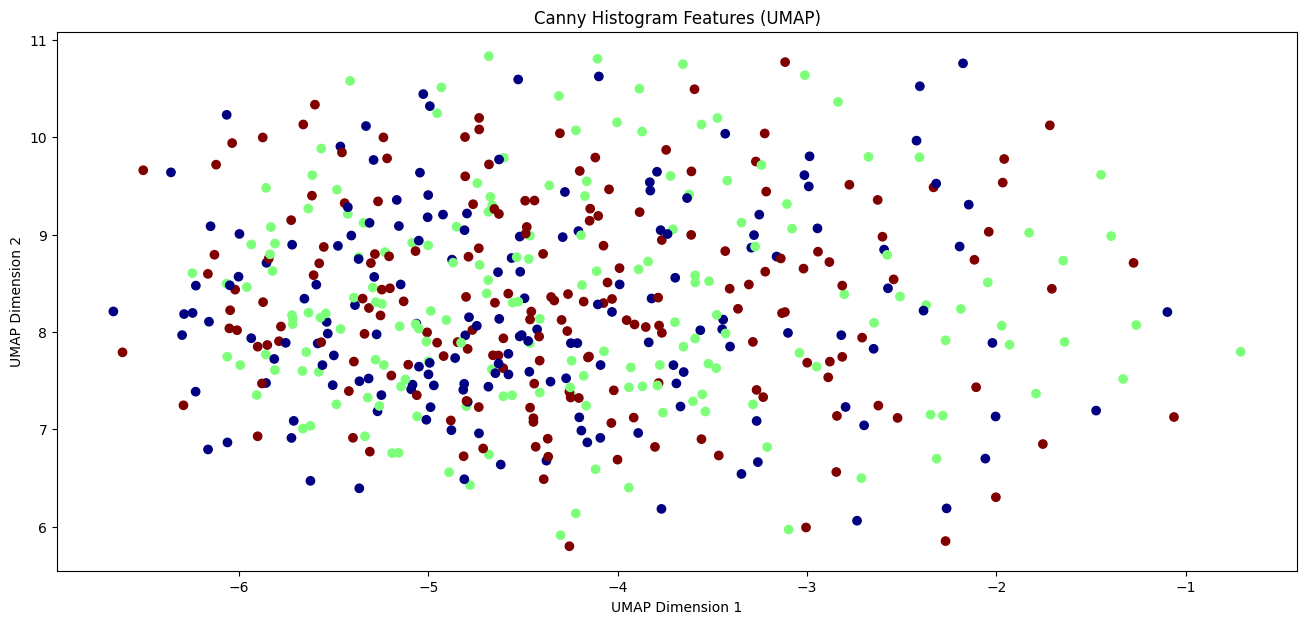

In [52]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=y_train)
plt.title('Canny Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

#### Try Again

In [56]:
best_params_rf_1 = {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 90}

In [57]:
param_grid_2 = { 
    'n_estimators': [200, 400, 500],
    'max_depth' : range(1,6),
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid_2, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'n_estimators': [200, 400, 500]})

In [58]:
best_params_rf_2 = cv_rf.best_params_

In [59]:
rf_best = RandomForestClassifier(max_depth=best_params_rf_2['max_depth'], criterion=best_params_rf_2['criterion'], n_estimators=best_params_rf_2['n_estimators'])
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500)

In [60]:
pred = rf_best.predict(X_test)
print("Accuracy for Random Forest: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy for Random Forest:  0.44298245614035087
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        80
           1       0.48      0.14      0.22        78
           2       0.39      0.73      0.50        70

    accuracy                           0.44       228
   macro avg       0.47      0.45      0.41       228
weighted avg       0.47      0.44      0.41       228

